In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

cats = pd.read_html('assets/Northwestern Wildcats field hockey - Wikipedia.html',encoding='utf-8',header = 0)[1]
wolves = pd.read_html('assets/Michigan Wolverines field hockey - Wikipedia.html',encoding='utf-8',header = 0)[2]
tps = pd.read_html('assets/Maryland Terrapins field hockey - Wikipedia.html',encoding='utf-8',header = 0)[1]


In [4]:
tps = tps[(tps['Year']>=2000)&(tps['Year']<=2019)]
tps.set_index('Year',inplace=True)
tps=tps['Overall']


cats = cats[(cats['Year']>=2000) & (cats['Year']<=2019)]
cats.set_index('Year',inplace=True)
cats=cats['Overall']

wolves = wolves[(wolves['Year']>=2000) & (wolves['Year']<=2019)]
wolves.set_index('Year',inplace=True)
wolves=wolves['Overall']





In [5]:
tps.rename('TerraPins',inplace=True)
cats.rename('WildCats',inplace=True)
wolves.rename('Wolverines',inplace=True)

results = pd.concat([tps,cats,wolves],axis=1)

print(results)

     TerraPins WildCats Wolverines
Year                              
2000      .826     6–13       .826
2001      .833     .133       .783
2002      .773     .316       .818
2003      .833     .500       .739
2004      .739     7–13       .739
2005      .920     .389       16–8
2006      .920     .368       .550
2007      .857     .222       .696
2008      .917     .350       .400
2009      .958     12–8       7–14
2010      .958     .550       .682
2011      .826     .571       .682
2012      .750     .800       .682
2013      .917     .750       .600
2014      .826     .696       .650
2015      .826     .619       .783
2016      .783     .619       .600
2017      .696     .682       .875
2018      .880     .474       .667
2019      .880     .667       .650


In [6]:
results.loc[2000,'WildCats']=0.316
results.loc[2004,'WildCats']=0.350
results.loc[2009,'WildCats']=0.600

results.loc[2005,'Wolverines']=0.667
results.loc[2009,'Wolverines']=0.333


results = results.astype('float')

print(results)

      TerraPins  WildCats  Wolverines
Year                                 
2000      0.826     0.316       0.826
2001      0.833     0.133       0.783
2002      0.773     0.316       0.818
2003      0.833     0.500       0.739
2004      0.739     0.350       0.739
2005      0.920     0.389       0.667
2006      0.920     0.368       0.550
2007      0.857     0.222       0.696
2008      0.917     0.350       0.400
2009      0.958     0.600       0.333
2010      0.958     0.550       0.682
2011      0.826     0.571       0.682
2012      0.750     0.800       0.682
2013      0.917     0.750       0.600
2014      0.826     0.696       0.650
2015      0.826     0.619       0.783
2016      0.783     0.619       0.600
2017      0.696     0.682       0.875
2018      0.880     0.474       0.667
2019      0.880     0.667       0.650


In [7]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt


In [8]:
plt.style.available

['grayscale',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-white',
 'ggplot',
 'seaborn-dark-palette',
 'bmh',
 'dark_background',
 'seaborn',
 'seaborn-bright',
 'seaborn-pastel',
 'seaborn-talk',
 'classic',
 'seaborn-dark',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-ticks']

In [9]:
plt.style.use('seaborn-paper')


<IPython.core.display.Javascript object>


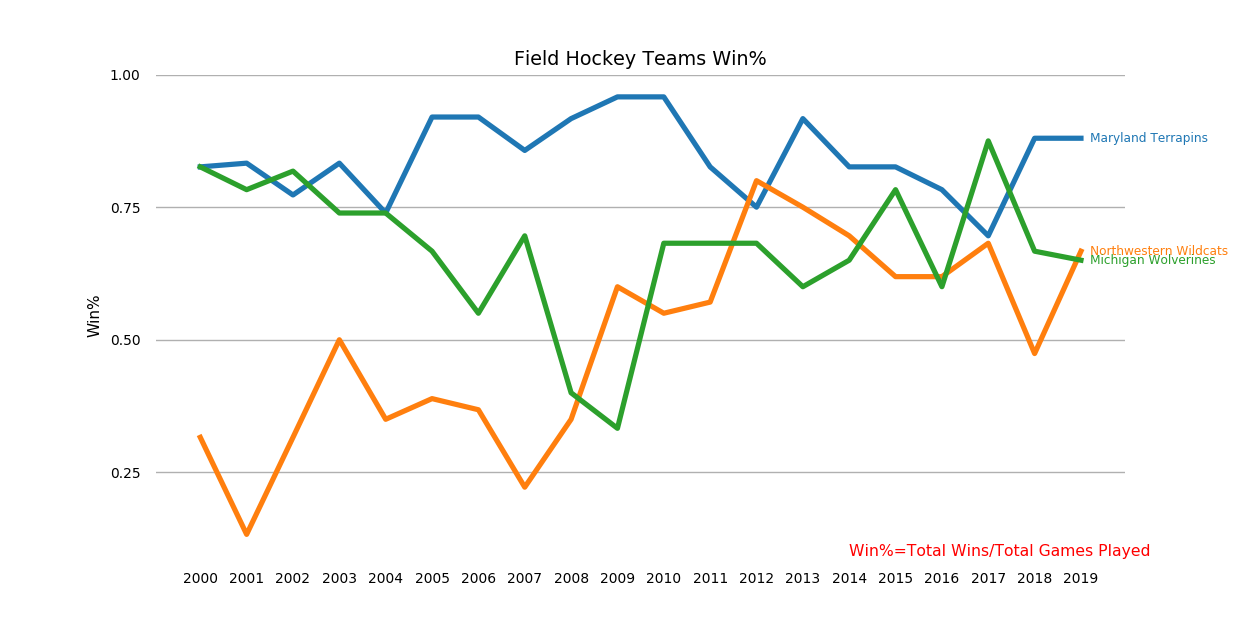

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'],
      dtype='object', name='Year')
[<matplotlib.lines.Line2D object at 0x7f9469b18a20>, <matplotlib.lines.Line2D object at 0x7f94672b5710>, <matplotlib.lines.Line2D object at 0x7f946c272cc0>]


In [42]:
fig = plt.figure(figsize=(10,5))
Xlabels = results.index.astype('str')
print(Xlabels)
plt.xticks(results.index)
lplt=plt.plot(results,lw=3)

print(lplt)
plt.title('Field Hockey Teams Win%',fontsize=11)
plt.ylabel('Win%')
plt.grid(b=False)

ax = fig.gca()
ax.set_xticklabels(Xlabels)
#ax.set_yticklabels([0,0.25,0.5,0.75,1])
for spine in ax.spines.values():
    spine.set_visible(False)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.grid(axis='y')
ax.yaxis.set_major_locator(MultipleLocator(0.25))

plt.tick_params(bottom=False,left=False)
i=0
lbls = ['Maryland Terrapins','Northwestern Wildcats','Michigan Wolverines']
for ln in lplt:
    ypos = ln.get_ydata()[19]
    xpos =  ln.get_xdata()[19]
    ax.text(xpos+0.2,ypos, lbls[i], 
                va='center', color=ln.get_color(), fontsize=7)
    i=i+1

ax.text('2014',0.1, 'Win%=Total Wins/Total Games Played', 
                va='center', color='r', fontsize=9)

plt.savefig('output.jpeg')